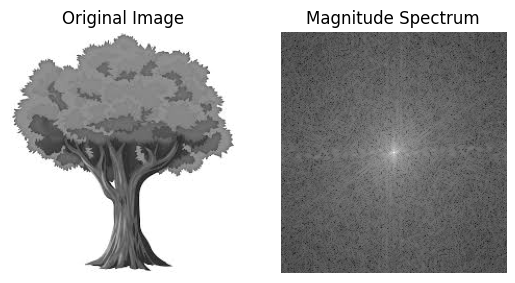

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('tree.jpeg', cv2.IMREAD_GRAYSCALE)

f_transform = np.fft.fft2(image)

# Shift the zero frequency component to the center
f_shift = np.fft.fftshift(f_transform)

magnitude_spectrum = 20 * np.log(np.abs(f_shift))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.show()


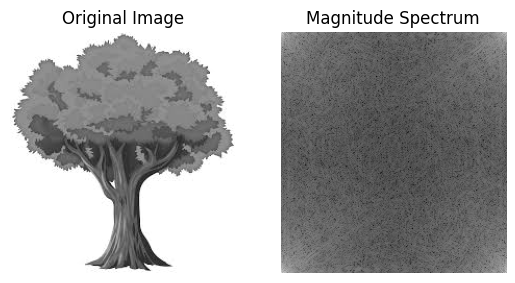

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('tree.jpeg', cv2.IMREAD_GRAYSCALE)

f_transform = np.fft.fft2(image)

# Shift the zero frequency component to the center
# f_shift = np.fft.fftshift(f_transform)

magnitude_spectrum = 20 * np.log(np.abs(f_transform))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.show()

In [2]:
def bandpass_filter(image, low_cutoff, high_cutoff):
    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2
    
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow-low_cutoff:crow+low_cutoff, ccol-low_cutoff:ccol+low_cutoff] = 1
    mask[crow-high_cutoff:crow+high_cutoff, ccol-high_cutoff:ccol+high_cutoff] = 0
    
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)
    
    f_shift_filtered = f_shift * mask
    
    f_ishift = np.fft.ifftshift(f_shift_filtered)
    restored_image = np.fft.ifft2(f_ishift)
    restored_image = np.abs(restored_image)
    
    return restored_image


In [10]:
def bandpass_filter2(image, low_cutoff, high_cutoff):
    dft = np.fft.fft2(image.astype(np.float32))
    dft_shifted = np.fft.fftshift(dft)

    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2

    mask = np.zeros((rows, cols), np.uint8)

    for i in range(rows):
        for j in range(cols):
            dist = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
            if low_cutoff < dist < high_cutoff:
                mask[i, j] = 1

    dft_shifted_filtered = dft_shifted * mask

    dft_filtered = np.fft.ifftshift(dft_shifted_filtered)
    filtered_image = np.fft.ifft2(dft_filtered)
    filtered_image = np.abs(filtered_image)

    filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX)
    filtered_image = np.uint8(filtered_image)

    return filtered_image

In [3]:
def bandreject_filter(image, low_cutoff, high_cutoff):
    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2
    
    mask = np.ones((rows, cols), np.uint8)
    mask[crow-low_cutoff:crow+low_cutoff, ccol-low_cutoff:ccol+low_cutoff] = 0
    mask[crow-high_cutoff:crow+high_cutoff, ccol-high_cutoff:ccol+high_cutoff] = 1
    
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)
    
    f_shift_filtered = f_shift * mask
    
    f_ishift = np.fft.ifftshift(f_shift_filtered)
    restored_image = np.fft.ifft2(f_ishift)
    restored_image = np.abs(restored_image)
    
    return restored_image


In [11]:
def bandreject_filter2(image, low_cutoff, high_cutoff):
    dft = np.fft.fft2(image.astype(np.float32))
    dft_shifted = np.fft.fftshift(dft)

    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2

    mask = np.ones((rows, cols), np.uint8)

    for i in range(rows):
        for j in range(cols):
            dist = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
            if low_cutoff < dist < high_cutoff:
                mask[i, j] = 0

    dft_shifted_filtered = dft_shifted * mask

    dft_filtered = np.fft.ifftshift(dft_shifted_filtered)
    filtered_image = np.fft.ifft2(dft_filtered)
    filtered_image = np.abs(filtered_image)

    filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX)
    filtered_image = np.uint8(filtered_image)

    return filtered_image

In [4]:
def notch_filter(image, u, v, D0):
    rows, cols = image.shape
    mask = np.ones((rows, cols), np.uint8)
    
    for i in range(rows):
        for j in range(cols):
            D = np.sqrt((i - u) ** 2 + (j - v) ** 2)
            if D < D0:
                mask[i, j] = 0
    
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)
    
    f_shift_filtered = f_shift * mask
    
    f_ishift = np.fft.ifftshift(f_shift_filtered)
    restored_image = np.fft.ifft2(f_ishift)
    restored_image = np.abs(restored_image)
    
    return restored_image


In [13]:
def notch_filter2(image, notch_center, radius):
    dft = np.fft.fft2(image.astype(np.float32))
    dft_shifted = np.fft.fftshift(dft)

    rows, cols = image.shape
    mask = np.ones((rows, cols), np.uint8)

    for i in range(rows):
        for j in range(cols):
            dist = np.sqrt((i - notch_center[0]) ** 2 + (j - notch_center[1]) ** 2)
            if dist <= radius:
                mask[i, j] = 0

    dft_shifted_filtered = dft_shifted * mask

    dft_filtered = np.fft.ifftshift(dft_shifted_filtered)
    filtered_image = np.fft.ifft2(dft_filtered)
    filtered_image = np.abs(filtered_image)

    filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX)
    filtered_image = np.uint8(filtered_image)

    return filtered_image

In [5]:
def optimum_notch_filter(image, notch_coords, D0):
    rows, cols = image.shape
    mask = np.ones((rows, cols), np.uint8)
    
    for u, v in notch_coords:
        for i in range(rows):
            for j in range(cols):
                D1 = np.sqrt((i - u) ** 2 + (j - v) ** 2)
                D2 = np.sqrt((i + u) ** 2 + (j + v) ** 2)
                if D1 < D0 or D2 < D0:
                    mask[i, j] = 0
    
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)
    
    f_shift_filtered = f_shift * mask
    
    f_ishift = np.fft.ifftshift(f_shift_filtered)
    restored_image = np.fft.ifft2(f_ishift)
    restored_image = np.abs(restored_image)
    
    return restored_image


In [6]:
def inverse_filter(image, H):
    f_transform = np.fft.fft2(image)
    restored_image = np.fft.ifft2(f_transform / H)
    restored_image = np.abs(restored_image)
    
    return restored_image


In [26]:
def inverse_filter2(degraded_image, psf):
    G = np.fft.fft2(degraded_image)
    G_shifted = np.fft.fftshift(G)

    H = np.fft.fft2(psf, s=degraded_image.shape)
    H_shifted = np.fft.fftshift(H)

    epsilon = 1e-10
    H_shifted[H_shifted == 0] = epsilon

    F_estimated_shifted = G_shifted / H_shifted

    F_estimated = np.fft.ifftshift(F_estimated_shifted)
    restored_image = np.fft.ifft2(F_estimated)
    restored_image = np.abs(restored_image)

    restored_image = cv2.normalize(restored_image, None, 0, 255, cv2.NORM_MINMAX)
    restored_image = np.uint8(restored_image)

    return restored_image

In [7]:
from scipy.signal import wiener

def wiener_filter(image, mysize=None, noise=None):
    restored_image = wiener(image, mysize=mysize, noise=noise)
    return restored_image


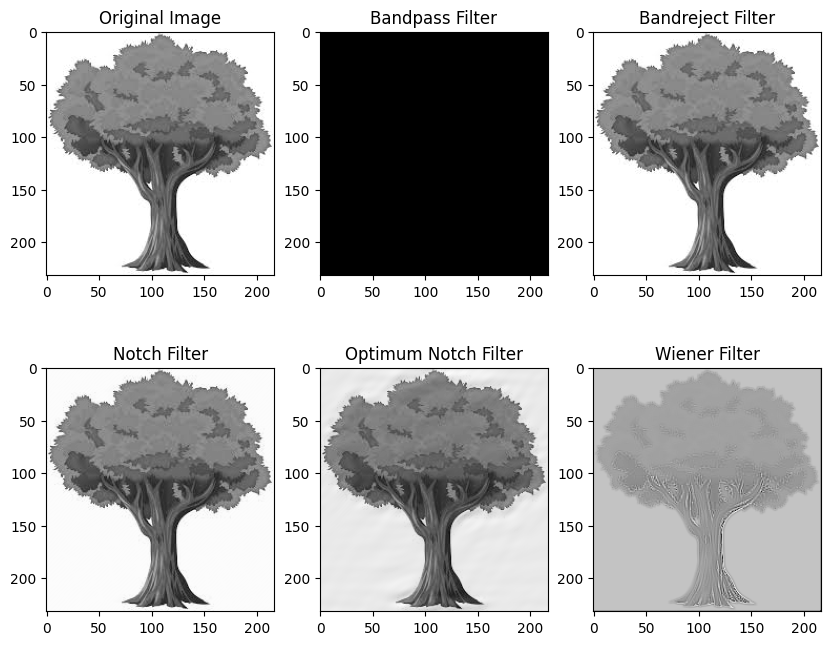

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('tree.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply Bandpass Filter
bandpass_img = bandpass_filter(image, 30, 60)

# Apply Bandreject Filter
bandreject_img = bandreject_filter(image, 30, 60)

# Apply Notch Filter (at coordinate (50,50) with radius 10)
notch_img = notch_filter(image, 50, 50, 10)

# Apply Optimum Notch Filter with multiple notches
optimum_notch_img = optimum_notch_filter(image, [(50, 50), (100, 100)], 10)

# Assume some degradation function H for inverse filtering
H = np.ones(image.shape)  # Placeholder, replace with actual degradation model
inverse_img = inverse_filter(image, H)

# Apply Wiener Filter
wiener_img = wiener_filter(image)

plt.figure(figsize=(10, 8))
plt.subplot(231), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(232), plt.imshow(bandpass_img, cmap='gray'), plt.title('Bandpass Filter')
plt.subplot(233), plt.imshow(bandreject_img, cmap='gray'), plt.title('Bandreject Filter')
plt.subplot(234), plt.imshow(notch_img, cmap='gray'), plt.title('Notch Filter')
plt.subplot(235), plt.imshow(optimum_notch_img, cmap='gray'), plt.title('Optimum Notch Filter')
plt.subplot(236), plt.imshow(inverse_img, cmap='gray'), plt.title('Inverse Filter')
plt.subplot(236), plt.imshow(wiener_img, cmap='gray'), plt.title('Wiener Filter')
plt.show()


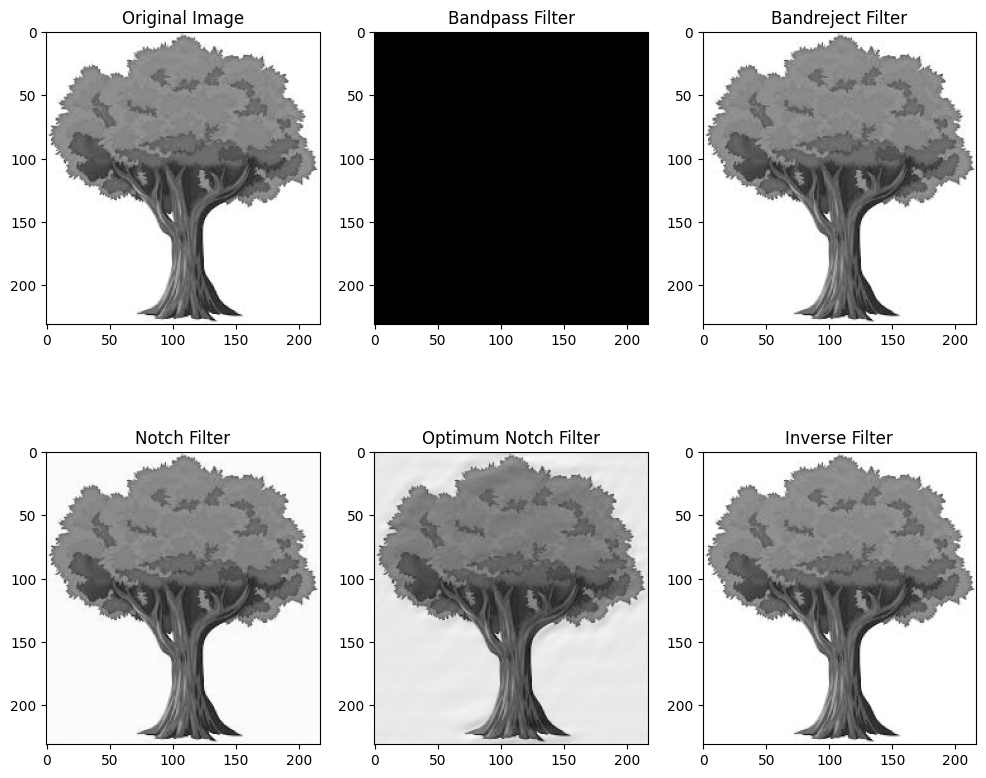

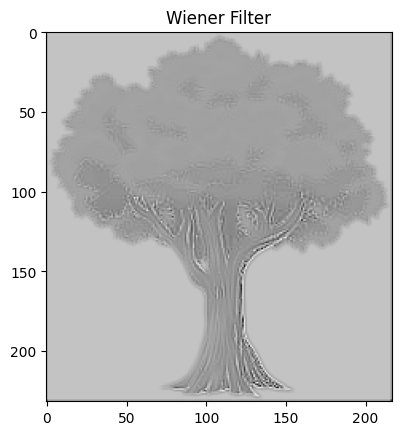

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import wiener

# Load the image in grayscale
image = cv2.imread('tree.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply Bandpass Filter (using the custom implementation from before)
bandpass_img = bandpass_filter(image, 30, 60)

# Apply Bandreject Filter (using the custom implementation from before)
bandreject_img = bandreject_filter(image, 30, 60)

# Apply Notch Filter (using the custom implementation from before)
notch_img = notch_filter(image, 50, 50, 10)

# Apply Optimum Notch Filter with multiple notches
optimum_notch_img = optimum_notch_filter(image, [(50, 50), (100, 100)], 10)

# Assume some degradation function H for inverse filtering
H = np.ones(image.shape)  # Placeholder, replace with actual degradation model
inverse_img = inverse_filter(image, H)

# Apply Wiener Filter
wiener_img = wiener(image)

# Display results in separate subplots
plt.figure(figsize=(12, 10))
plt.subplot(231), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(232), plt.imshow(bandpass_img, cmap='gray'), plt.title('Bandpass Filter')
plt.subplot(233), plt.imshow(bandreject_img, cmap='gray'), plt.title('Bandreject Filter')
plt.subplot(234), plt.imshow(notch_img, cmap='gray'), plt.title('Notch Filter')
plt.subplot(235), plt.imshow(optimum_notch_img, cmap='gray'), plt.title('Optimum Notch Filter')
plt.subplot(236), plt.imshow(inverse_img, cmap='gray'), plt.title('Inverse Filter')
plt.figure(), plt.imshow(wiener_img, cmap='gray'), plt.title('Wiener Filter')
plt.show()


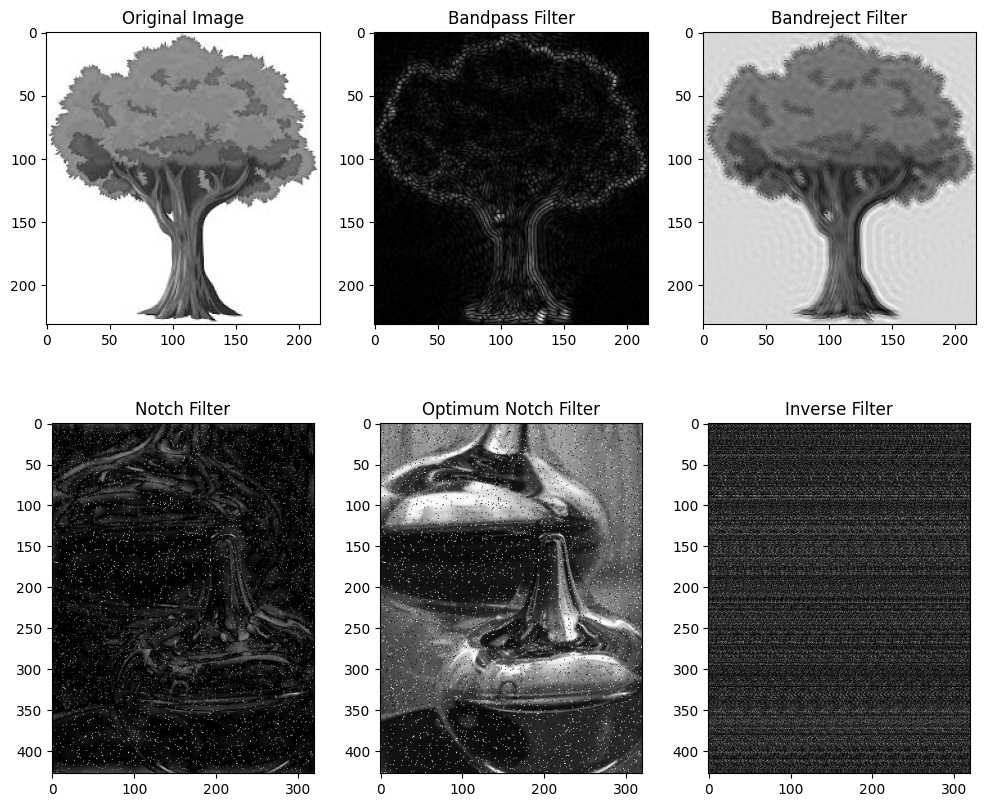

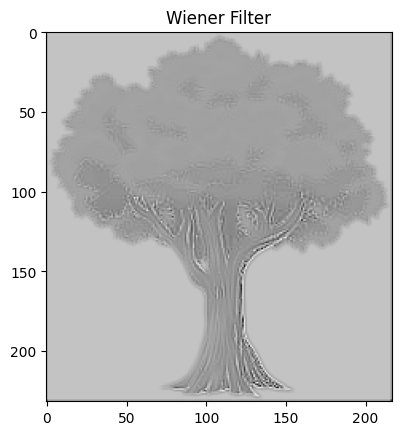

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import wiener

# Load the image in grayscale
image = cv2.imread('tree.jpeg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('bottle.png', cv2.IMREAD_GRAYSCALE)

# Apply Bandpass Filter (using the custom implementation from before)
bandpass_img = bandpass_filter2(image, 30, 60)

# Apply Bandreject Filter (using the custom implementation from before)
bandreject_img = bandreject_filter2(image, 30, 60)

# Apply Notch Filter (using the custom implementation from before)
center = (image2.shape[0] // 2, image2.shape[1] // 2)
#(50, 50)
notch_img = notch_filter2(image2,center , 10)

# Apply Optimum Notch Filter with multiple notches
optimum_notch_img = optimum_notch_filter(image2, [(50, 50), (100, 100)], 10)


# Assume some degradation function H for inverse filtering
# H = np.ones(image2.shape)  # Placeholder, replace with actual degradation model
# inverse_img = inverse_filter(image2, H)


psf_size = 21
psf = np.zeros((psf_size, psf_size))
psf[psf_size//2, :] = 1  # Simulate motion blur
psf = psf / psf.sum()  # Normalize the PSF

# Apply the inverse filter
inverse_img = inverse_filter2(image2, psf)


# Apply Wiener Filter
wiener_img = wiener(image)

# Display results in separate subplots
plt.figure(figsize=(12, 10))
plt.subplot(231), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(232), plt.imshow(bandpass_img, cmap='gray'), plt.title('Bandpass Filter')
plt.subplot(233), plt.imshow(bandreject_img, cmap='gray'), plt.title('Bandreject Filter')
plt.subplot(234), plt.imshow(notch_img, cmap='gray'), plt.title('Notch Filter')
plt.subplot(235), plt.imshow(optimum_notch_img, cmap='gray'), plt.title('Optimum Notch Filter')
plt.subplot(236), plt.imshow(inverse_img, cmap='gray'), plt.title('Inverse Filter')
plt.figure(), plt.imshow(wiener_img, cmap='gray'), plt.title('Wiener Filter')
plt.show()


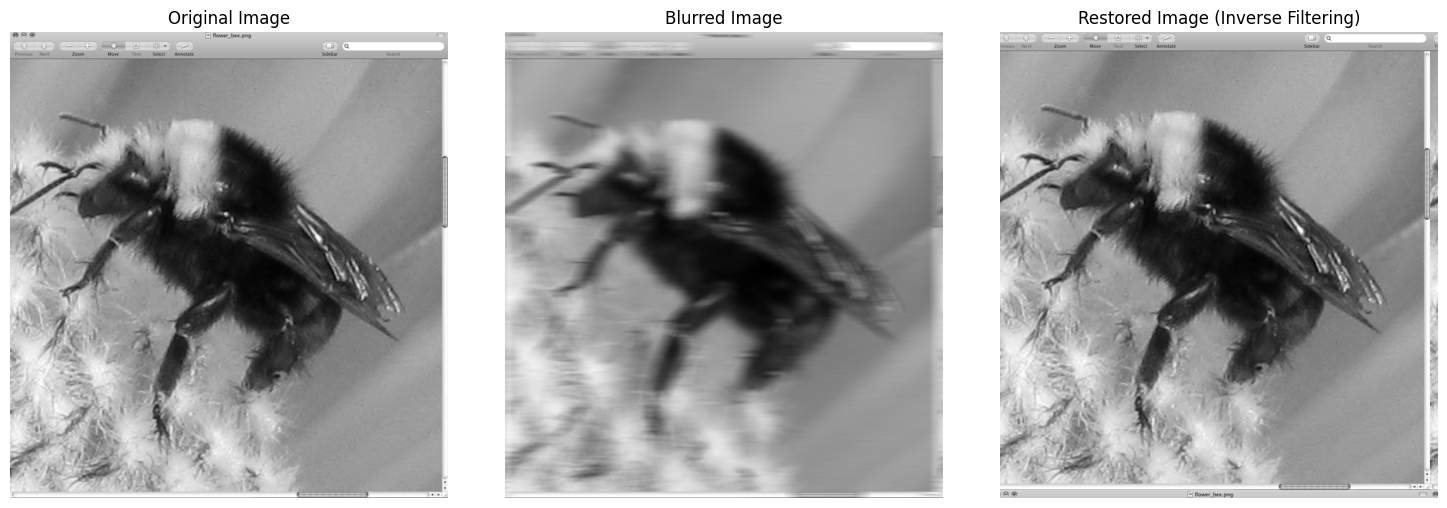

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
def create_motion_blur_kernel(size, angle):
    kernel = np.zeros((size, size))
    kernel[int((size - 1) / 2), :] = np.ones(size)
    kernel = np.roll(kernel, int(angle / 180 * size), axis=1)
    kernel = kernel / size
    return kernel
def apply_motion_blur(image, kernel_size, angle):
    kernel = create_motion_blur_kernel(kernel_size, angle)
    blurred_image = convolve2d(image, kernel, mode='same', boundary='wrap')
    return blurred_image
def inverse_filter(image, degradation_function):
    F = np.fft.fft2(image)
    H = np.fft.fft2(degradation_function, s=image.shape)
    H[H == 0] = 1  # Avoid division by zero
    G = F / H
    restored_image = np.fft.ifft2(G)
    return np.abs(restored_image)
image_path = "bee.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = image.astype(np.float32) / 255  
kernel_size = 21  
angle = 45 
blurred_image = apply_motion_blur(image, kernel_size, angle)
degradation_function = create_motion_blur_kernel(kernel_size, angle)
restored_image_inv = inverse_filter(blurred_image, degradation_function)
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(2, 3, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')
plt.subplot(2, 3, 3)
plt.imshow(restored_image_inv, cmap='gray')
plt.title('Restored Image (Inverse Filtering)')
plt.axis('off')
plt.tight_layout()
plt.show()


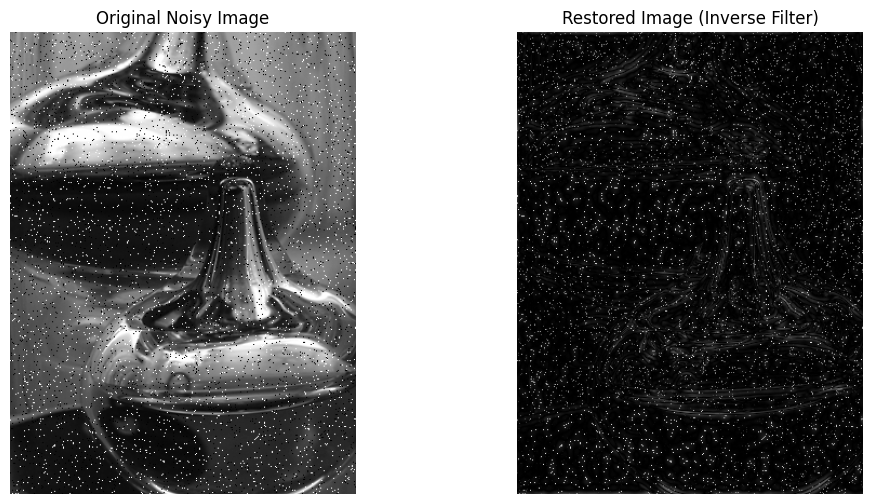

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('bottle.png', cv2.IMREAD_GRAYSCALE)

# Convert image to float32 for more precise computation
image_float = np.float32(image)

# Apply Fourier Transform to the image
dft = cv2.dft(image_float, flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted = np.fft.fftshift(dft)

# Create a simple inverse filter
rows, cols = image.shape
crow, ccol = rows // 2 , cols // 2

# Create a Gaussian filter in the frequency domain (just an example, this would be the degradation function)
sigma = 10  # Adjust the sigma for the blur effect
x = np.linspace(-ccol, ccol, cols)
y = np.linspace(-crow, crow, rows)
x, y = np.meshgrid(x, y)
gaussian_filter = np.exp(-(x**2 + y**2) / (2 * sigma**2))

# Create an inverse filter by taking the reciprocal of the Gaussian filter
# Add a small value (epsilon) to avoid division by zero
epsilon = 1e-3
inverse_filter = 1 / (gaussian_filter + epsilon)

# Apply the inverse filter in the frequency domain
filtered_dft = dft_shifted * inverse_filter[:,:,np.newaxis]

# Shift back and apply the inverse DFT
idft_shifted = np.fft.ifftshift(filtered_dft)
restored_image = cv2.idft(idft_shifted)
restored_image = cv2.magnitude(restored_image[:,:,0], restored_image[:,:,1])

# Normalize the image for display
restored_image = cv2.normalize(restored_image, None, 0, 255, cv2.NORM_MINMAX)
restored_image = np.uint8(restored_image)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Noisy Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(restored_image, cmap='gray')
plt.title('Restored Image (Inverse Filter)')
plt.axis('off')

plt.show()


In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to create a motion blur kernel
def motion_blur_kernel(size, angle):
    kernel = np.zeros((size, size))
    d = int((size - 1) / 2)
    
    # Calculate the line equation for the motion blur
    for i in range(size):
        x = int(d + i * np.cos(angle) - (size - 1) * np.sin(angle) / 2)
        y = int(d + i * np.sin(angle) + (size - 1) * np.cos(angle) / 2)
        
        if 0 <= x < size and 0 <= y < size:
            kernel[y, x] = 1
    
    kernel = kernel / kernel.sum()
    return kernel

# Load the image
image = cv2.imread('bottle.png', cv2.IMREAD_GRAYSCALE)

# Create a motion blur kernel
size = 15  # Size of the kernel
angle = np.pi / 4  # Angle of motion blur (45 degrees)
motion_kernel = motion_blur_kernel(size, angle)

# Apply the motion blur to the image
distorted_image = cv2.filter2D(image, -1, motion_kernel)

# Apply Fourier Transform to the distorted image
dft = cv2.dft(np.float32(distorted_image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted = np.fft.fftshift(dft)

# Create the inverse filter in the frequency domain
motion_kernel_padded = np.pad(motion_kernel, ((0, image.shape[0] - size), (0, image.shape[1] - size)), 'constant')
motion_kernel_fft = np.fft.fft2(motion_kernel_padded)
inverse_filter_fft = 1 / (motion_kernel_fft + 1e-3)  # Adding a small value to avoid division by zero

# Apply the inverse filter in the frequency domain
filtered_dft = dft_shifted * inverse_filter_fft[:,:,np.newaxis]

# Shift back and apply the inverse DFT
idft_shifted = np.fft.ifftshift(filtered_dft)
restored_image = cv2.idft(idft_shifted)
restored_image = cv2.magnitude(restored_image[:,:,0], restored_image[:,:,1])

# Normalize the image for display
restored_image = cv2.normalize(restored_image, None, 0, 255, cv2.NORM_MINMAX)
restored_image = np.uint8(restored_image)

# Plot the results
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(distorted_image, cmap='gray')
plt.title('Distorted Image (Motion Blur)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(restored_image, cmap='gray')
plt.title('Restored Image (Inverse Filter)')
plt.axis('off')

plt.show()


error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'idft'
> Overload resolution failed:
>  - src data type = 15 is not supported
>  - Expected Ptr<cv::UMat> for argument 'src'
